In [14]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
GLyearQCL = pd.read_csv('../queries_results/USA not inner/USA year not inner quadcl count.csv', header = 0)
quadcodes = pd.DataFrame({'QuadClass': [1, 2, 3, 4], 'QuadDescription': ['Verbal Cooperation', 'Material Cooperation', 'Verbal Conflict','Material Conflict']})
GLyearQCL = GLyearQCL.merge(quadcodes.set_index('QuadClass'), on='QuadClass', how='left')

In [15]:
GLyearQCL

,Year,QuadClass,Count,QuadDescription
0,2018,4,537293,Material Conflict
1,2017,3,619996,Verbal Conflict
2,2020,4,353513,Material Conflict
3,2019,1,2595417,Verbal Cooperation
4,2018,3,560829,Verbal Conflict
5,2015,3,407486,Verbal Conflict
6,2019,3,497805,Verbal Conflict
7,2017,1,3205334,Verbal Cooperation
8,2017,2,499071,Material Cooperation
9,2020,1,1656240,Verbal Cooperation


/home/micha/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


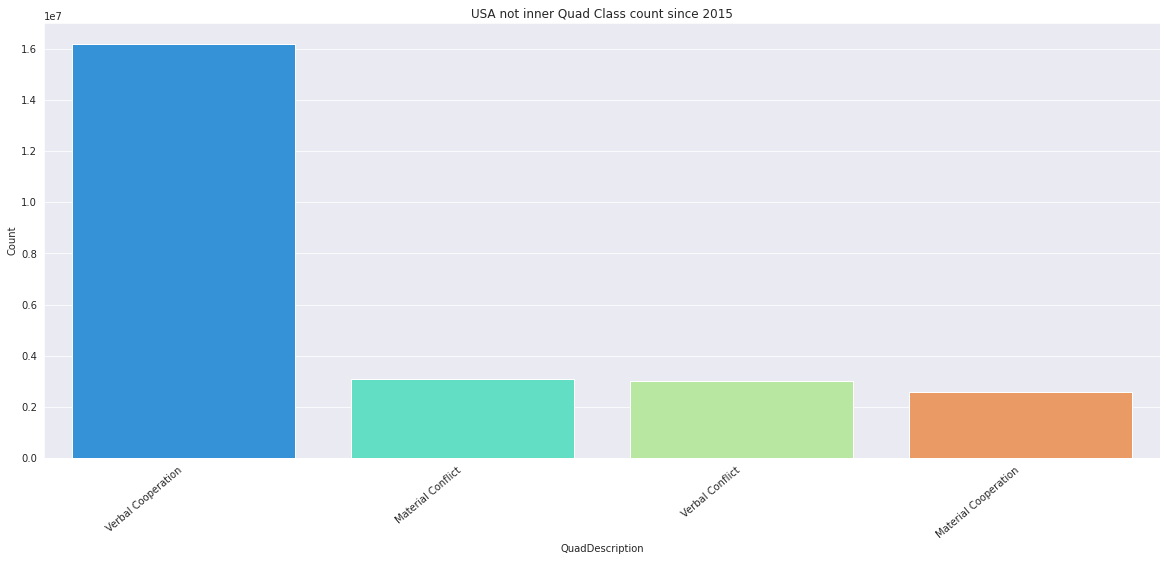

In [16]:
s = GLyearQCL.groupby("QuadDescription", as_index=False).sum().sort_values(by="Count", ascending=False)
g = sns.barplot(s.QuadDescription, s.Count, palette='rainbow')
g.set_title("USA not inner Quad Class count 2015-2020")
g.set(ylabel='Count')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)
plt.savefig('../../src/fig/USA not inner/QC.png', bbox_inches='tight')

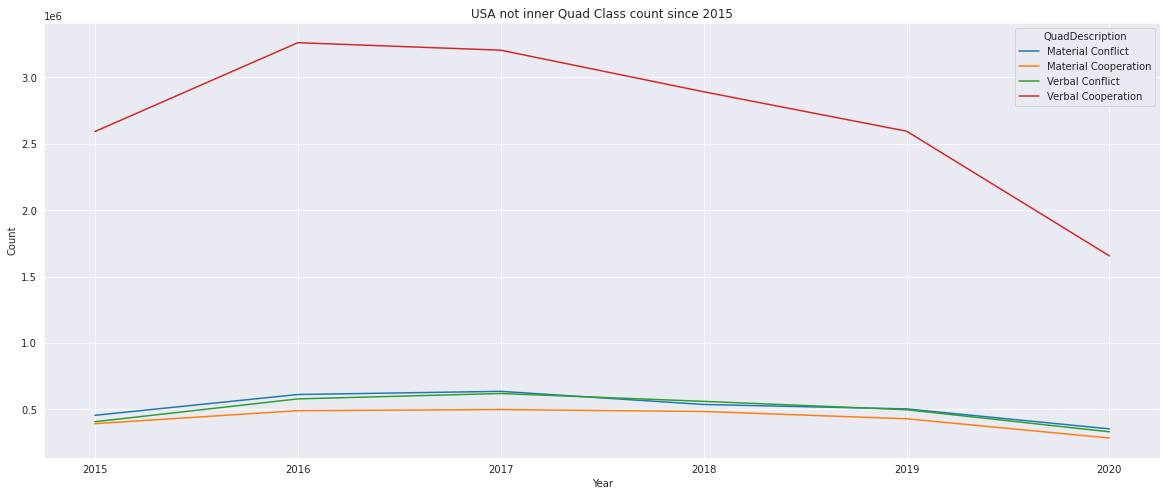

In [17]:
s = GLyearQCL.groupby(["QuadDescription", "Year"], as_index=False).sum().sort_values(by="Count", ascending=False)
s = s.groupby(["Year","QuadDescription"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("USA not inner Quad Class count 2015-2020")
g.figure.set_size_inches(20,8)
plt.savefig('../../src/fig/USA not inner/QCtime.png', bbox_inches='tight')

In [18]:
s = GLyearQCL.groupby(["QuadDescription", "Year"], as_index=False).sum().sort_values(by="Count", ascending=False)
s = s.groupby(["Year","QuadDescription"]).agg({'Count':'sum'})

s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())

s

Count          %
Year QuadDescription                         
2015 Material Conflict      455791  11.842388
     Material Cooperation   392899  10.208324
     Verbal Conflict        407486  10.587324
     Verbal Cooperation    2592634  67.361964
2016 Material Conflict      612296  12.384094
     Material Cooperation   490838   9.927525
     Verbal Conflict        579363  11.718002
     Verbal Cooperation    3261716  65.970378
2017 Material Conflict      636240  12.825762
     Material Cooperation   499071  10.060615
     Verbal Conflict        619996  12.498304
     Verbal Cooperation    3205334  64.615319
2018 Material Conflict      537293  12.007055
     Material Cooperation   484528  10.827899
     Verbal Conflict        560829  12.533021
     Verbal Cooperation    2892161  64.632026
2019 Material Conflict      503911  12.514274
     Material Cooperation   429557  10.667744
     Verbal Conflict        497805  12.362635
     Verbal Cooperation    2595417  64.455347
2020 Material Conflict      353513  13.463028
     Material Cooperation   284616  10.839186
     Verbal Conflict        331437  12.622296
     Verbal Cooperation    1656240  63.075490

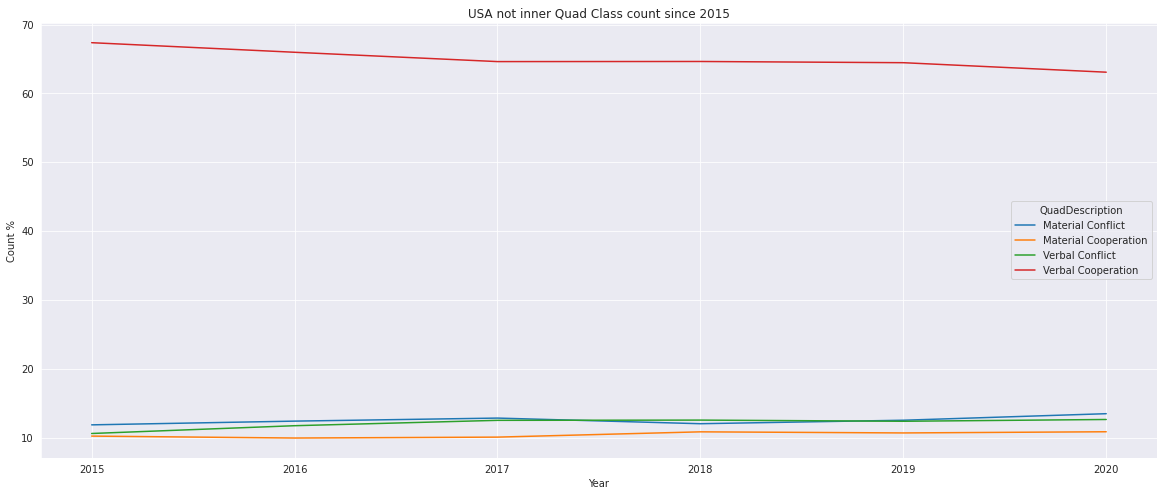

In [19]:
g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("USA not inner Quad Class count 2015-2020")
g.figure.set_size_inches(20,8)
plt.savefig('../../src/fig/USA not inner/QCperc.png', bbox_inches='tight')